<div style="direction:rtl;line-height:500%;text-align:justify;">
	<font face="B Zar", size=5px>
        <h2>هوش مصنوعی، پروژه MLP، تخمین خروجی تابع</h2>
        احمد سلیمی - ۹۷۱۰۶۰۱۳
    </font>
</div>

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [266]:
class FunctionLearner:
    
    def __init__(self, function, data_size, train_domain=(-100, 100)):
        self.function = function
        self.X_train, self.y_train = self.make_random_dataset(data_size, train_domain)
        self.model = self.create_model()
    
    def make_random_dataset(self, size:int, domain):
        X = np.random.uniform(domain[0], domain[1], (size, 1))
        y = self.function(X).reshape(size,)
        return X, y
    
    def create_model(self):
        model = Sequential()
        model.add(Dense(32, input_shape=[1], activation='tanh', kernel_initializer="uniform"))
        for i in range(26):
            model.add(Dense(8, activation='tanh'))
        model.add(Dense(1))
        
        model.compile(loss='mse', optimizer='adam')
        return model
    
    def plot_result(self, x, xlim=None, ylim=None):
        x.sort()
        plt.figure(figsize=(25, 15))
        plt.plot(x, self.function(x), color='skyblue', label='original', linewidth=12, zorder=1)
        plt.scatter(self.X_train, self.y_train, color='green', label='train data', s=50, zorder=2)
        plt.plot(x, self.model.predict(x), color='red', label='predicted', linewidth=3, zorder=3)
        plt.grid()
        if xlim:
            plt.xlim(xlim)
        if ylim:
            plt.ylim(ylim)
        plt.legend()
    
    def learn(self):
        self.model.fit(self.X_train, self.y_train, batch_size=32, epochs=50, verbose=1, validation_split=0.2)

In [267]:
learner = FunctionLearner(lambda x: 100 * np.log(x), 10000, (0.000001, 100000))
learner.learn()

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 3s 363us/step - loss: 1111745.0783 - val_loss: 1108657.8810
Epoch 2/50
8000/8000 [==============================] - 1s 149us/step - loss: 1104564.8202 - val_loss: 1103116.9820
Epoch 3/50
8000/8000 [==============================] - 1s 148us/step - loss: 1099345.5015 - val_loss: 1098084.7440
Epoch 4/50
8000/8000 [==============================] - 1s 147us/step - loss: 1094405.8585 - val_loss: 1093211.8960
Epoch 5/50
8000/8000 [==============================] - 1s 143us/step - loss: 1089579.9727 - val_loss: 1088419.6750
Epoch 6/50
8000/8000 [==============================] - 1s 148us/step - loss: 1084820.4668 - val_loss: 1083681.6150
Epoch 7/50
8000/8000 [==============================] - 1s 141us/step - loss: 1080105.6945 - val_loss: 1078979.7120
Epoch 8/50
8000/8000 [==============================] - 1s 184us/step - loss: 1075424.0935 - val_loss: 1074310.0120
Epoch 9/50
8000/8000 [==

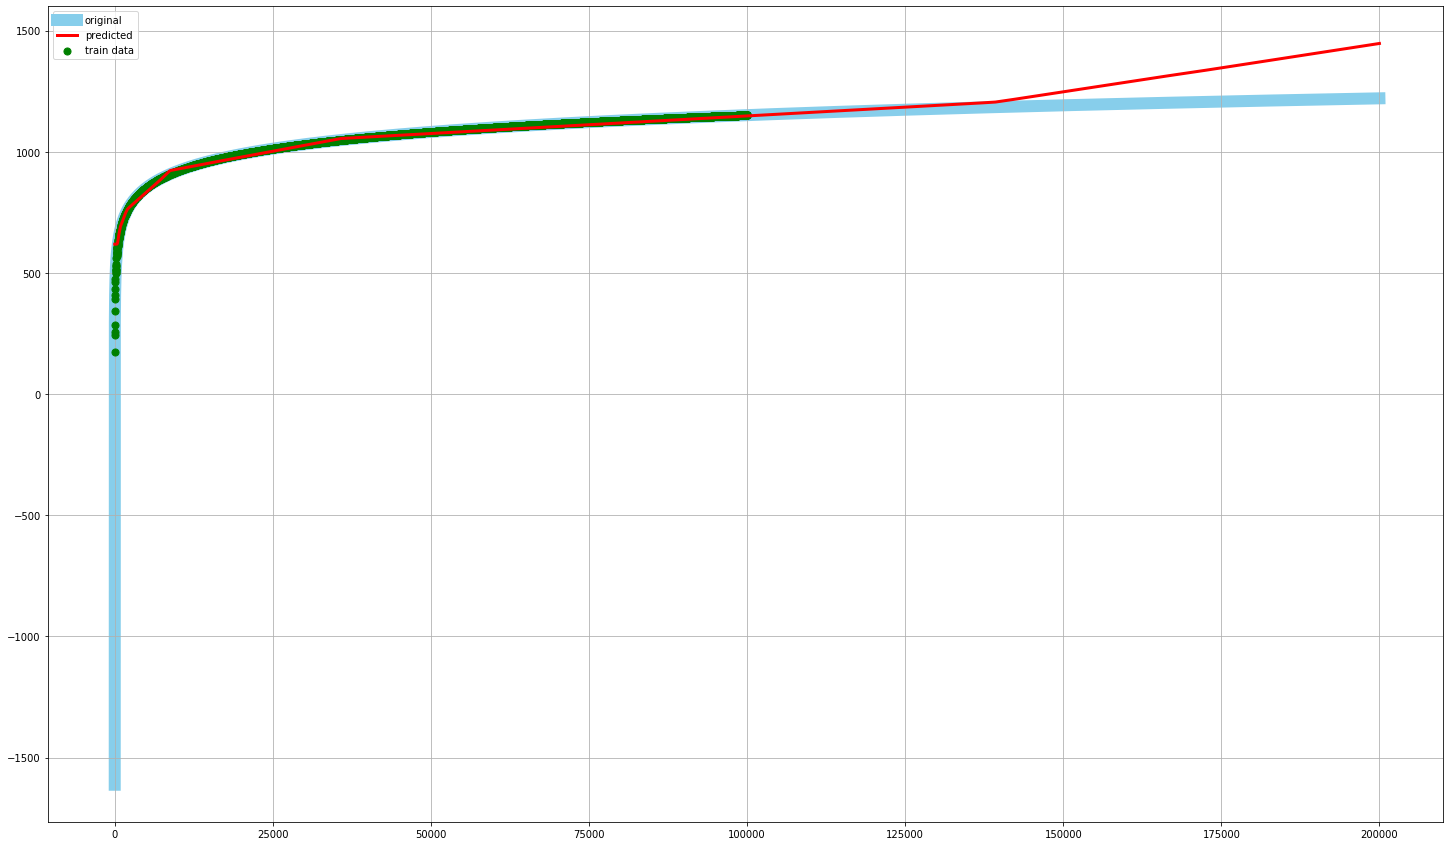

In [257]:
learner.plot_result(np.arange(0.0000001, 200000, 5))

In [262]:
learner = FunctionLearner(lambda x: 50 * x ** 3, 10000, (-1000, 1000))
learner.learn()

Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 2s 256us/step - loss: 359892743152803446784.0000 - val_loss: 360212974559794823168.0000
Epoch 2/50
8000/8000 [==============================] - 1s 152us/step - loss: 359892743750937739264.0000 - val_loss: 360212974559794823168.0000
Epoch 3/50
8000/8000 [==============================] - 1s 153us/step - loss: 359892742308378443776.0000 - val_loss: 360212974559794823168.0000
Epoch 4/50
8000/8000 [==============================] - 1s 183us/step - loss: 359892743293540892672.0000 - val_loss: 360212974559794823168.0000
Epoch 5/50
8000/8000 [==============================] - 1s 147us/step - loss: 359892742836144046080.0000 - val_loss: 360212974559794823168.0000
Epoch 6/50
8000/8000 [==============================] - 1s 143us/step - loss: 359892742941697179648.0000 - val_loss: 360212974559794823168.0000
Epoch 7/50
8000/8000 [==============================] - 1s 149us/step - loss: 3598927443

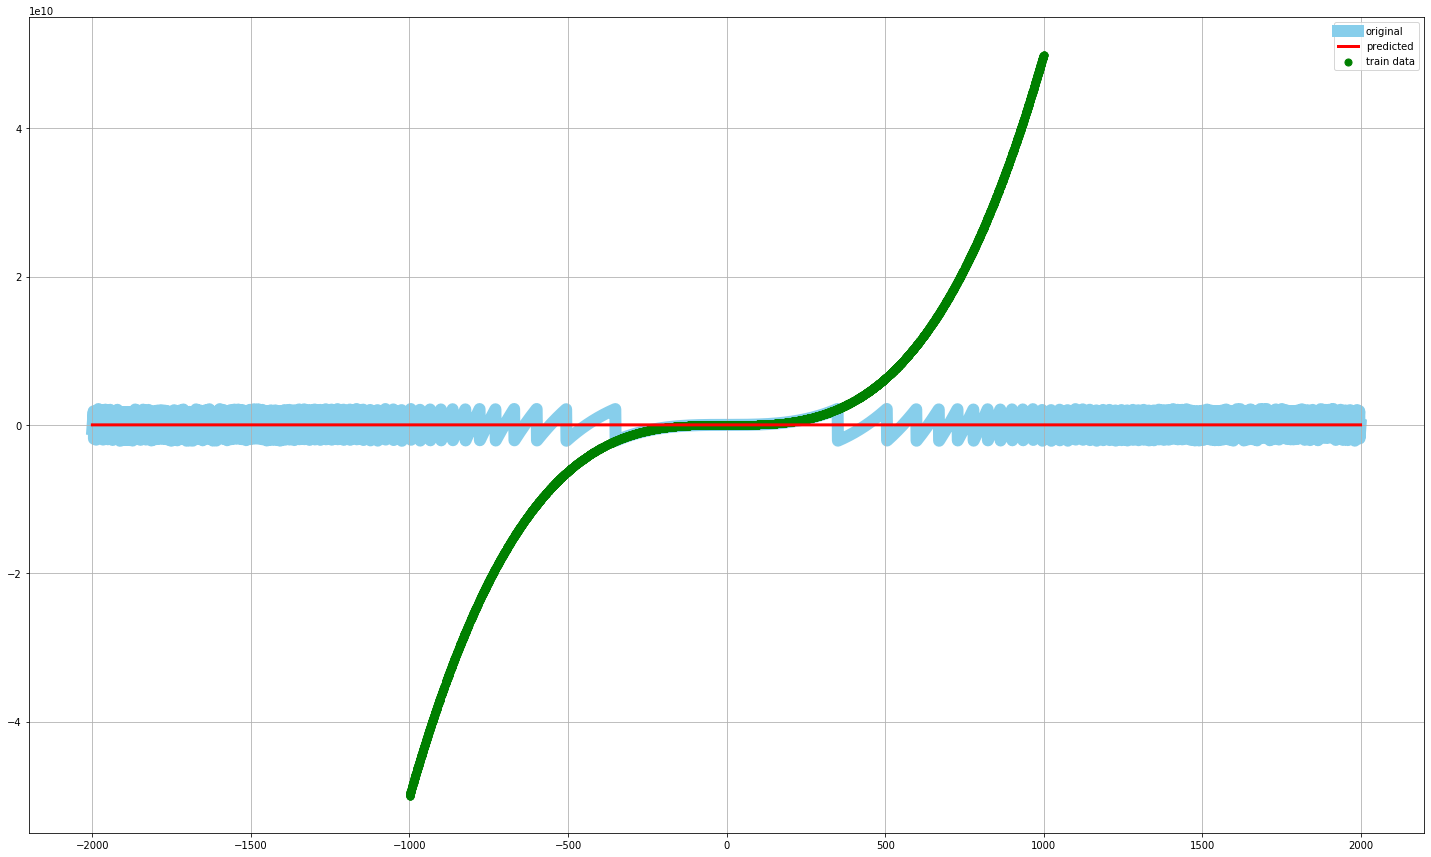

In [264]:
learner.plot_result(np.arange(-2000, 2000, 1))